<h2>Competitor Data</h2>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
# Read Data and View first five rows
df = pd.read_csv('competitor_campaigns.csv')
df.head()

,Competitor ID,Campaign ID,Ad Spend,Impressions,Clicks,Conversions,Sales,Campaign Start Date,Campaign End Date
0,Competitor A,1,1373,432495,24027,3003,786786,2023-07-02,2023-07-07
1,Competitor C,2,1275,455175,45517,5057,338819,2023-09-03,2023-09-05
2,Competitor B,3,1406,940614,52256,3483,257742,2023-05-14,2023-05-25
3,Competitor A,4,1820,1126580,62587,6258,1983786,2023-06-22,2023-07-16
4,Competitor C,5,1216,464512,27324,3036,789360,2023-11-16,2023-12-04


In [5]:
# check for number of columns
df.columns

Index(['Competitor ID', 'Campaign ID', 'Ad Spend', 'Impressions', 'Clicks',
       'Conversions', 'Sales', 'Campaign Start Date', 'Campaign End Date'],
      dtype='object')

In [6]:
# Shape of data
df.shape

(100, 9)

In [7]:
# Length of columns
len(df.columns)

9

In [8]:
# Check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Competitor ID        100 non-null    object
 1   Campaign ID          100 non-null    int64 
 2   Ad Spend             100 non-null    int64 
 3   Impressions          100 non-null    int64 
 4   Clicks               100 non-null    int64 
 5   Conversions          100 non-null    int64 
 6   Sales                100 non-null    int64 
 7   Campaign Start Date  100 non-null    object
 8   Campaign End Date    100 non-null    object
dtypes: int64(6), object(3)
memory usage: 7.2+ KB


In [9]:
# Convert date column
df['Campaign Start Date'] = pd.to_datetime(df['Campaign Start Date'])
df['Campaign Start Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Campaign Start Date
Non-Null Count  Dtype         
--------------  -----         
100 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.0 bytes


In [10]:
df['Campaign End Date'] = pd.to_datetime(df['Campaign End Date'])
df['Campaign Start Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Campaign Start Date
Non-Null Count  Dtype         
--------------  -----         
100 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.0 bytes


<h2>EDA -- Exploratory Data Analysis</h2>
<p>Start date</p>

In [11]:
# Copy data
df1 = df[:]

In [12]:
# View data
df1.tail()

,Competitor ID,Campaign ID,Ad Spend,Impressions,Clicks,Conversions,Sales,Campaign Start Date,Campaign End Date
95,Competitor B,96,650,458900,41718,3792,1190688,2023-04-14,2023-04-21
96,Competitor C,97,1228,1200984,70646,11774,3438008,2023-06-08,2023-06-16
97,Competitor C,98,1746,1534734,85263,14210,5499270,2023-02-22,2023-03-01
98,Competitor B,99,775,727725,38301,2946,730608,2023-07-26,2023-07-28
99,Competitor A,100,1370,632940,48687,8114,4024544,2023-03-07,2023-03-31


In [13]:
df1.index = df['Campaign Start Date']

In [14]:
df1.tail()

,Competitor ID,Campaign ID,Ad Spend,Impressions,Clicks,Conversions,Sales,Campaign Start Date,Campaign End Date
Campaign Start Date,,,,,,,,,
2023-04-14,Competitor B,96,650,458900,41718,3792,1190688,2023-04-14,2023-04-21
2023-06-08,Competitor C,97,1228,1200984,70646,11774,3438008,2023-06-08,2023-06-16
2023-02-22,Competitor C,98,1746,1534734,85263,14210,5499270,2023-02-22,2023-03-01
2023-07-26,Competitor B,99,775,727725,38301,2946,730608,2023-07-26,2023-07-28
2023-03-07,Competitor A,100,1370,632940,48687,8114,4024544,2023-03-07,2023-03-31


In [15]:
df.drop(columns='Campaign Start Date', inplace=True)

Text(0, 0.5, 'Frequency')

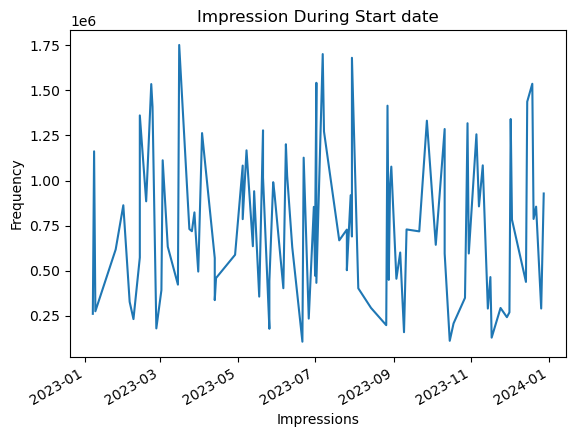

In [23]:
df1['Impressions'].plot()
plt.xlabel('Impressions')
plt.title('Impression During Start date')
plt.ylabel('Frequency')

In [22]:
# Statistical Overview
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Campaign ID,100.0,50.5,1.0,25.75,50.5,75.25,100.0,29.011492
Ad Spend,100.0,1272.58,575.0,1013.5,1267.5,1577.5,1972.0,389.009729
Impressions,100.0,753573.7,106080.0,417633.0,700441.0,1078374.0,1751588.0,422861.435151
Clicks,100.0,52268.05,5583.0,28818.75,45740.0,70673.75,154644.0,32338.556
Conversions,100.0,5774.51,398.0,2961.75,4918.0,8031.75,23354.0,4143.6358
Sales,100.0,1539478.33,85373.0,594816.0,1131468.5,2160520.25,6375642.0,1323090.003391
Campaign Start Date,100,2023-07-08 12:43:12,2023-01-07 00:00:00,2023-04-13 00:00:00,2023-07-01 12:00:00,2023-10-11 00:00:00,2023-12-28 00:00:00,NaN
Campaign End Date,100,2023-07-23 12:57:36,2023-01-11 00:00:00,2023-04-27 18:00:00,2023-07-18 12:00:00,2023-10-23 00:00:00,2024-01-17 00:00:00,NaN


In [21]:
#Single spread
df1['Impressions'].var()

178811793338.0303

In [26]:
# Aggregate
def range(Series):
    return Series.max() - Series.min()

In [27]:
df1[['Impressions','Clicks','Conversions','Sales']].agg(range)

Impressions    1645508
Clicks          149061
Conversions      22956
Sales          6290269
dtype: int64

In [29]:
for i in df.describe():
    print(f'Standard deviation for {i}')
    print(df1[i].std())
    print('*' * 5)
    print(" ")

Standard deviation for Campaign ID
29.011491975882016
*****
 
Standard deviation for Ad Spend
389.00972904662586
*****
 
Standard deviation for Impressions
422861.43515107915
*****
 
Standard deviation for Clicks
32338.55600006272
*****
 
Standard deviation for Conversions
4143.635800400855
*****
 
Standard deviation for Sales
1323090.0033905713
*****
 
Standard deviation for Campaign End Date
102 days 21:17:12.973887389
*****
 


In [33]:
pd.pivot_table(data=df1, values=['Conversions','Clicks','Impressions','Ad Spend'], columns=['Campaign End Date'], aggfunc='mean')

Campaign End Date,2023-01-11,2023-01-26,2023-01-31,2023-02-09,2023-02-14,2023-02-15,2023-02-25,2023-02-27,2023-03-01,2023-03-02,...,2023-12-18,2023-12-19,2023-12-21,2023-12-23,2023-12-25,2023-12-29,2024-01-05,2024-01-09,2024-01-11,2024-01-17
Ad Spend,918.0,1232.0,1315.0,1280.0,1592.0,683.0,664.0,1961.0,1811.0,722.0,...,1274.0,1581.0,1416.0,1455.0,1352.0,1045.0,1579.0,861.0,1018.0,1443.0
Clicks,18622.0,116177.0,24985.0,71893.0,36335.0,14471.0,44079.0,104687.0,89594.0,16353.0,...,12740.0,143712.0,67047.0,46046.0,43714.0,92796.0,118182.0,61069.0,39794.0,16113.0
Conversions,1241.0,12908.0,1665.0,4792.0,6055.0,1447.0,3673.0,6979.0,12323.0,2044.0,...,849.0,10265.0,8380.0,3289.0,3362.0,8436.0,10743.0,8724.0,5684.0,1464.0
Impressions,260712.0,1161776.0,274835.0,862720.0,617696.0,231537.0,573032.0,1360934.0,1471805.0,327066.0,...,242060.0,1437129.0,1340952.0,782790.0,786864.0,927960.0,1536367.0,854973.0,437740.0,290043.0


<h2>Campaign End Date</h2>

In [34]:
# Copy data
df2 = df[:]

In [35]:
df2.index = df['Campaign End Date']

In [36]:
df2.head()

,Competitor ID,Campaign ID,Ad Spend,Impressions,Clicks,Conversions,Sales,Campaign End Date
Campaign End Date,,,,,,,,
2023-07-07,Competitor A,1,1373,432495,24027,3003,786786,2023-07-07
2023-09-05,Competitor C,2,1275,455175,45517,5057,338819,2023-09-05
2023-05-25,Competitor B,3,1406,940614,52256,3483,257742,2023-05-25
2023-07-16,Competitor A,4,1820,1126580,62587,6258,1983786,2023-07-16
2023-12-04,Competitor C,5,1216,464512,27324,3036,789360,2023-12-04


In [37]:
df2.drop(columns='Campaign End Date', inplace=True)

Text(0, 0.5, 'Clicks')

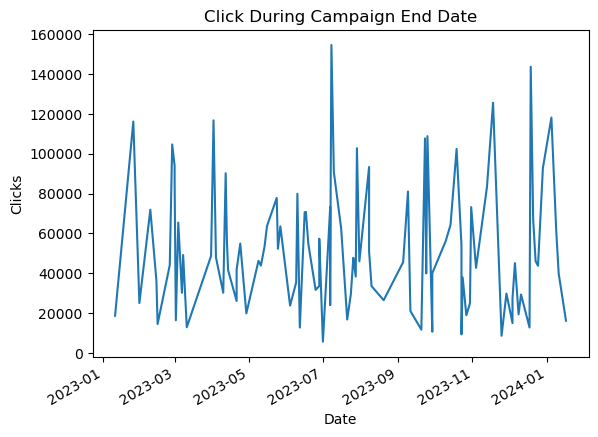

In [39]:
df2['Clicks'].plot()
plt.title('Click During Campaign End Date')
plt.xlabel('Date')
plt.ylabel('Clicks')

In [42]:
# unique values for Competitor
df2['Competitor ID'].unique()

array(['Competitor A', 'Competitor C', 'Competitor B'], dtype=object)

In [43]:
df2['Competitor ID'].value_counts()

Competitor ID
Competitor C    46
Competitor B    33
Competitor A    21
Name: count, dtype: int64

In [44]:
# Max value based on each competitor
df2.groupby('Competitor ID')[['Impressions','Clicks','Conversions','Sales']].max()

,Impressions,Clicks,Conversions,Sales
Competitor ID,,,,
Competitor A,1680480,143712,13337,4024544
Competitor B,1751588,125618,23354,6375642
Competitor C,1701088,154644,15548,5499270


<h2>Visualisation</h2>

<Axes: xlabel='Impressions', ylabel='Count'>

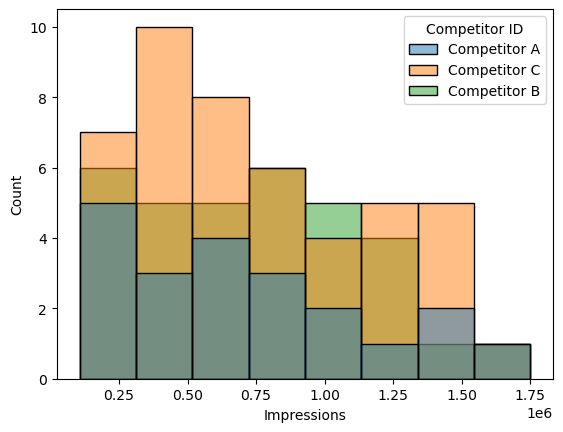

In [45]:
# Plot with seaborn 
sb.histplot(data=df2, x='Impressions', hue='Competitor ID')

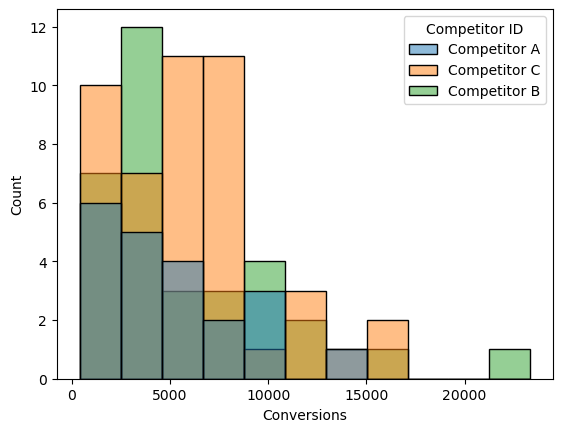

In [67]:
sb.histplot(data=df2, x='Conversions', hue='Competitor ID')
plt.savefig('Plot1.png')

<Axes: xlabel='Clicks'>

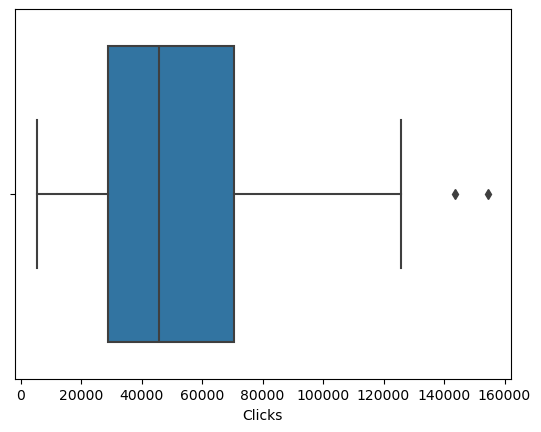

In [62]:
sb.boxplot(data=df2, x='Clicks', hue='Competitor ID')

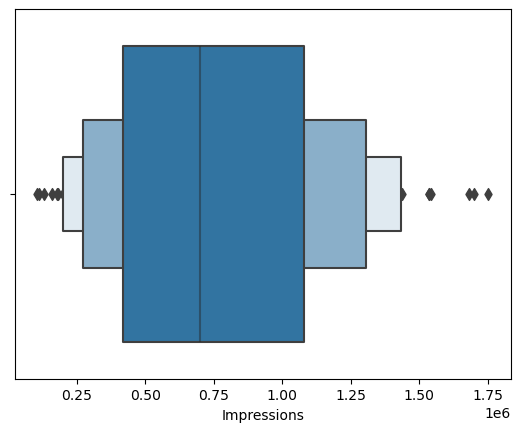

In [68]:
sb.boxenplot(data=df2, x='Impressions', hue='Competitor ID')
plt.savefig('plot2.png')

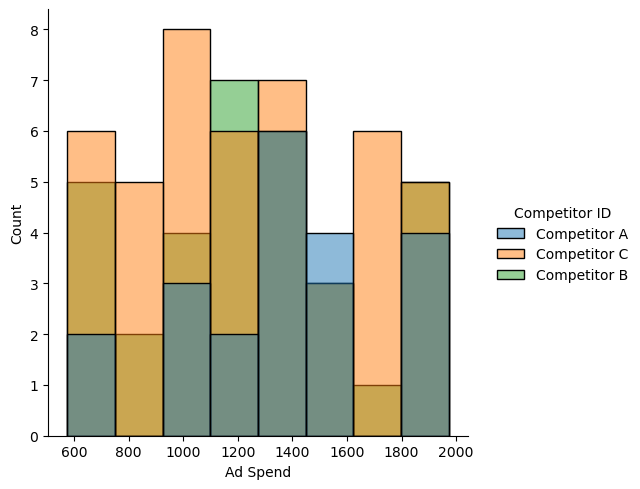

In [66]:
sb.displot(data=df2, x='Ad Spend', hue='Competitor ID')

In [69]:
df[['Impressions','Clicks','Conversions','Sales']].corr()

,Impressions,Clicks,Conversions,Sales
Impressions,1.000000,0.919667,0.814778,0.711661
Clicks,0.919667,1.000000,0.822308,0.710667
Conversions,0.814778,0.822308,1.000000,0.738994
Sales,0.711661,0.710667,0.738994,1.000000


In [70]:
df[['Impressions','Clicks','Conversions','Sales']].cov()

,Impressions,Clicks,Conversions,Sales
Impressions,1.788118e+11,1.257620e+10,1.427641e+09,3.981628e+11
Clicks,1.257620e+10,1.045782e+09,1.101887e+08,3.040717e+10
Conversions,1.427641e+09,1.101887e+08,1.716972e+07,4.051461e+09
Sales,3.981628e+11,3.040717e+10,4.051461e+09,1.750567e+12


<Axes: >

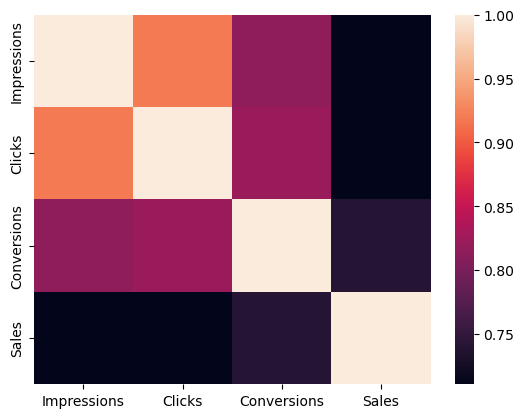

In [71]:
sb.heatmap(df[['Impressions','Clicks','Conversions','Sales']].corr())